<a href="https://colab.research.google.com/github/estrella-celeste/ColabNoteboook/blob/main/EstrDiazU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unit 2 Project**

In [20]:
#Install this because its necessary
!pip install preliz

In [21]:
#Import libraries because its necessary
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm


I am going to analyze the US Men's National Soccer Team's win rate from 2022 till currently.

A soccer game usually ends with winning team or a losing team. I will consider a tied game as it never happened.

I will make an assumption based on the tournament I known of: 2022 FIFA World Cup Final tournament. In total, USMNT had 4 games in which they won 1 game, lost 1 game and were tied in 2 games.


In order to find the prior, I am going to use the betanomial distribution.

<Axes: >

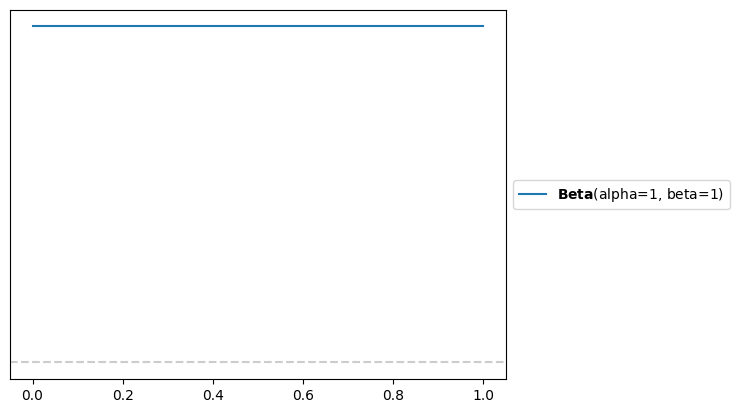

In [22]:
#We are going to calculate and graph the prior using alpha=1 and beta=1

pz.Beta(alpha=1, beta=1).plot_pdf()

I used alpha = 1 and beta = 1 because in our scenario 4 games happened but 1 game was won and 1 game was lost. But our graph came out funky showing that all probabilites were possible. This happens because the number 1 messes the equation because in the equation there are exponents and 1 is used as 1 so we get the equation to equal 1.

So I am going to increased the alpha = 2 and beta = 2 which would equal to 4 matches. This would help us find our prior.

<Axes: >

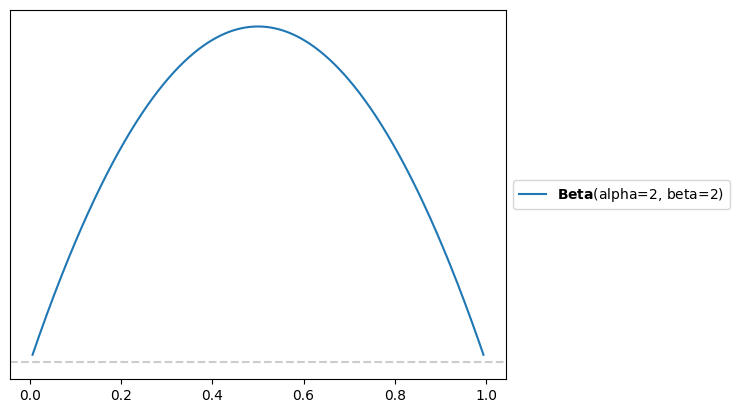

In [23]:
#We are going to graph again the prior using alpha=2 and beta=2

pz.Beta(alpha=2, beta=2).plot_pdf()

The graph above shows our prior. The prior (P(θ)) looks correct and matches my prediction of 50%. In other words, I think that the win rate of the USMNT is 50%. The line shows all the possbile chances but the peak shows the most likely probabilty. The betanomial distribution was used to show a probability with all the possible chances based on an assumption. The alpha is option 1 and the beta is option 2 of an outcome. In our case the alpha is the number of games won and the beta is the number of games lost.


Since I want to know the actual win rate of the USMNT, I research more about their games and results.

According to [Wikipedia,](https://en.wikipedia.org/wiki/United_States_men%27s_national_soccer_team_results_(2020%E2%80%93present))

In 2022, the USMNT had 16 soccer games. In total, they won 6 games, lost 4 games and were tied in 6 games.

In 2023, they had 18 soccer games. In total, they won 10 games, lost 3 games and were tied in 5 games.

In 2024, so far they have had 8 games. In total, they won 3 games, lost 4 games and tied in 1 game.

Since I am considering tied games as it never happened I'm going to adjust the data a bit.

In 2022, they won 6 games and lost 4 games.

In 2023, they won 10 games and lost 3 games.

In 2024, they won 3 games and lost 4 games.

In total, they had won 19 games out of 30 games. They lost 11 games.

Now I am going to input our data in a formula called a binomial in order to find the likelihood.

<Axes: >

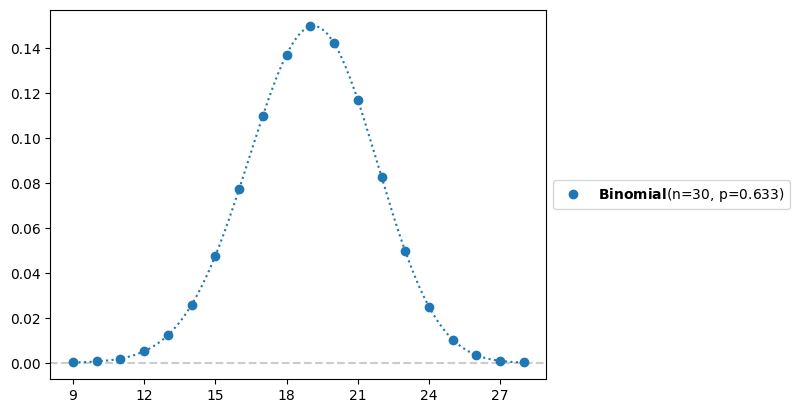

In [24]:
#We are going to find the likelihood by using Binomial
pz.Binomial(n = 30, p = 19/30 ).plot_pdf()

This graph shows the likelihood (P(y|θ)). The n shows the number of games while the p shows the probability of games won. In other words, n=30 games and p=19/30=0.633. Because we obtained new data, we were able to come with a likelihood. This is a probability based on data and not our belief. The graph shows a p=0.633 meaning that the likelihood is 63.3% for the USMNT to win a game.


Now lets figure our the USMNT's win rate by using the pymc model.

In [39]:
#Import library as a form to troubleshoot
import pymc as pm

In [45]:
#This is our likelihood data

#win rate is WR

#The number of wins
WR_wins = np.repeat(1,19)

#The number of losses
WR_losses = np.repeat(0,11)

#We combine wins and losses into one array
WR_data = np.concatenate( [WR_wins,WR_losses] )


In [54]:
#This is our prior data

 #we define our prior with the wins and loss from 2022 World Cup
  #notice how we make alpha and beta floats by using '.'

with pm.Model() as usmnt_WR_model:
 #We are going to define our prior
  θ = pm.Beta('θ' , alpha = 2. , beta = 2.)

#we define our likelihood

#Think of Bernoulli as a stand in for the binomial distribution
  #It doesn't have inherent info about number of games, but the number of games
  #is included in the data anyway.
  y = pm.Bernoulli('y', p = θ, observed = WR_data)

#This is the posterior
  #this part is new. We sample from our posterior because we don't actually
  #have a formula for it.
  idata_WR = pm.sample(1000)

<Axes: title={'center': 'θ'}>

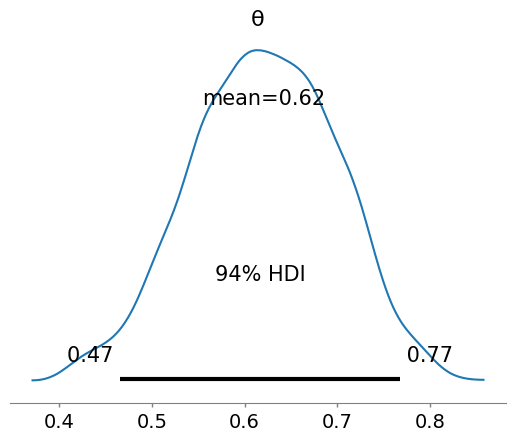

In [55]:
#Now the time we were waiting for: the posterior
#Please work
az.plot_posterior(idata_WR)

The pymc model above shows the posterior. The posterior was obtained by multiplying the likelihood with the prior. In other words, the posterior is basically p(θ)p(y|θ)=p(θ|y). The model shows a mean of .62 oe 62% and the θ is under the curve of the line. We get this number because the purpose of the posterior is to obtain a probability supported by data. For instance, our prior or guess was 50%, but with our data we obtained a likelihood of 63.3%. By putting our likelihood and prior into the posterior formula, we obtained a new probability.

In conclusion, the USMNT has a win rate of 62% from 2022 till now. So there is a probability of 62% for the USMNT to win their next game.